In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from collections import Counter 

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report 
from sklearn.svm import SVC
from xgboost import XGBClassifier

from imblearn.over_sampling import SMOTE

In [3]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [4]:
df_copy = df.copy()

In [5]:
df_copy.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [6]:
df_copy.shape

(7043, 21)

In [7]:
df_copy.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [8]:
df_copy["Churn"].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

<Axes: xlabel='Churn'>

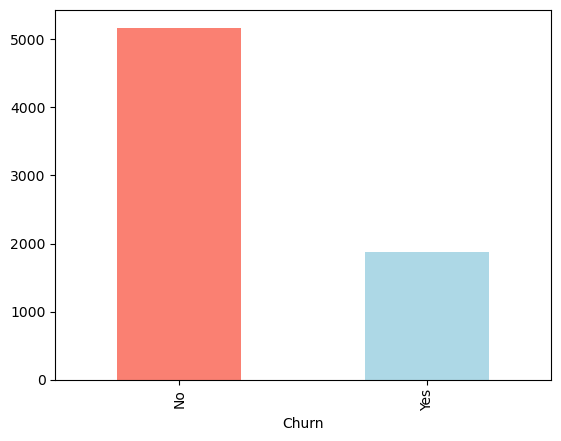

In [9]:
df_copy["Churn"].value_counts().plot(kind="bar", color=["salmon", "lightblue"])

In [10]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [11]:
df_copy.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [12]:
df_copy.drop('customerID', axis=1, inplace=True)

In [13]:
df_copy.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [14]:
df_copy.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [15]:
df_copy.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [16]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [17]:
df_copy['TotalCharges'] = pd.to_numeric(df_copy['TotalCharges'], errors = 'coerce') 

In [18]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


UNIVARIATE ANALYSIS

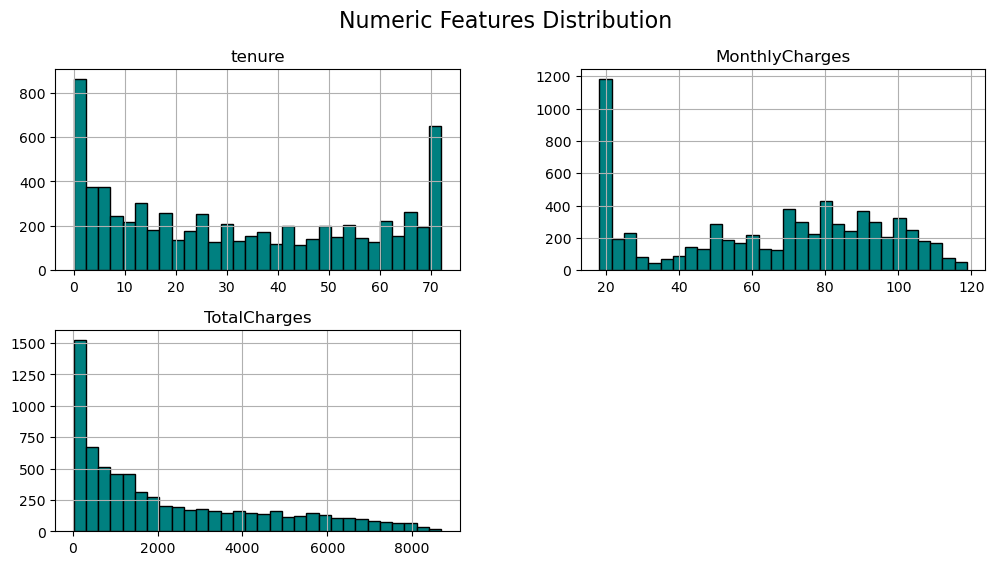

In [19]:
num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
df_copy[num_cols].hist(bins=30, figsize=(12,6), color='teal', edgecolor='black')
plt.suptitle('Numeric Features Distribution', fontsize=16)
plt.show()

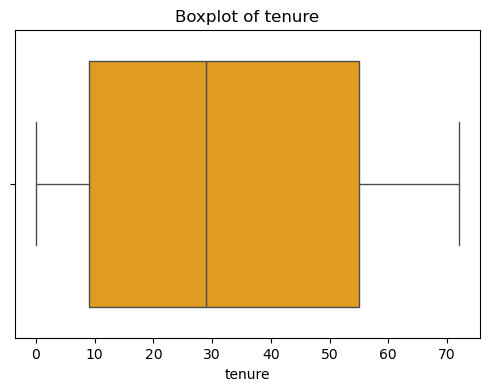

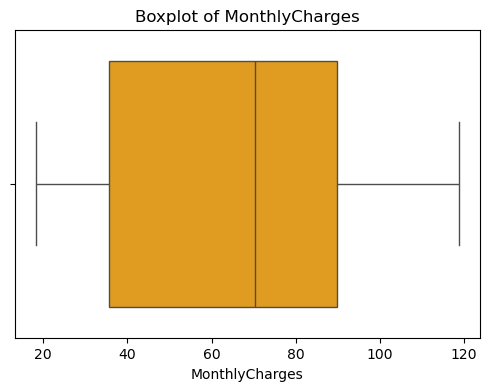

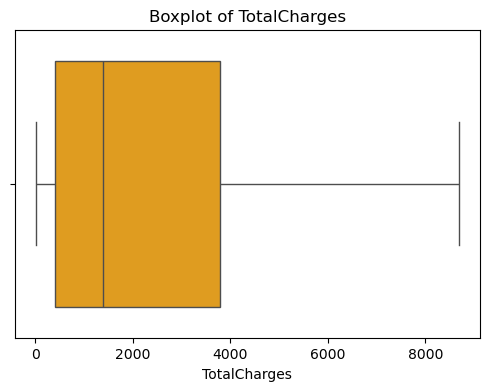

In [20]:
for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df_copy[col], color='orange')
    plt.title(f'Boxplot of {col}')
    plt.show()

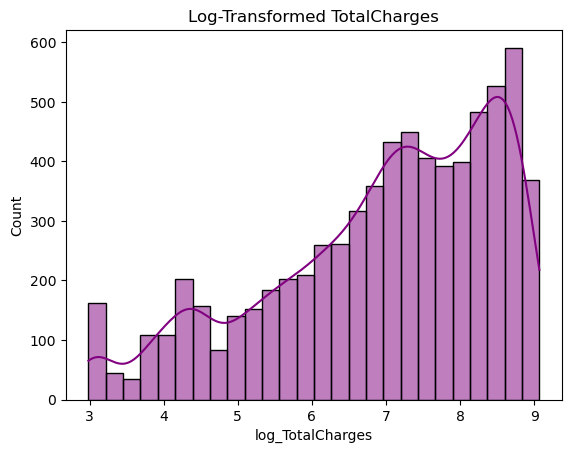

In [21]:
# Log Transformation Check
for col in ['TotalCharges']:
    df_copy[f'log_{col}'] = np.log1p(df_copy[col])
    sns.histplot(df_copy[f'log_{col}'], kde=True, color='purple')
    plt.title(f'Log-Transformed {col}')
    plt.show()

Use-case:

1. Reduce skew
2. Stabilize variance

In [22]:
cat_cols = df_copy.select_dtypes(include='object').columns.tolist()
cat_cols.remove('Churn')

In [23]:
for col in cat_cols:
    print(f"\n{col} value counts:")
    print(df_copy[col].value_counts())


gender value counts:
gender
Male      3555
Female    3488
Name: count, dtype: int64

Partner value counts:
Partner
No     3641
Yes    3402
Name: count, dtype: int64

Dependents value counts:
Dependents
No     4933
Yes    2110
Name: count, dtype: int64

PhoneService value counts:
PhoneService
Yes    6361
No      682
Name: count, dtype: int64

MultipleLines value counts:
MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64

InternetService value counts:
InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64

OnlineSecurity value counts:
OnlineSecurity
No                     3498
Yes                    2019
No internet service    1526
Name: count, dtype: int64

OnlineBackup value counts:
OnlineBackup
No                     3088
Yes                    2429
No internet service    1526
Name: count, dtype: int64

DeviceProtection value counts:
DeviceProtection
No                     3

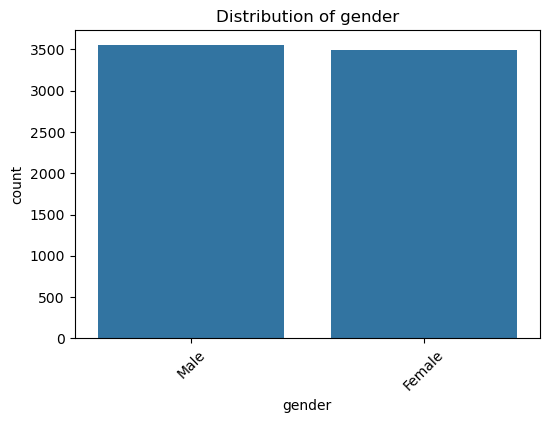

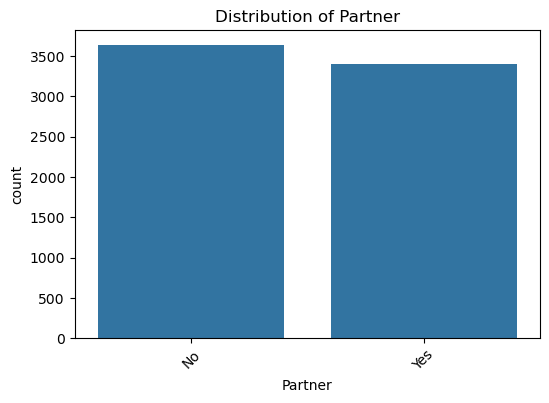

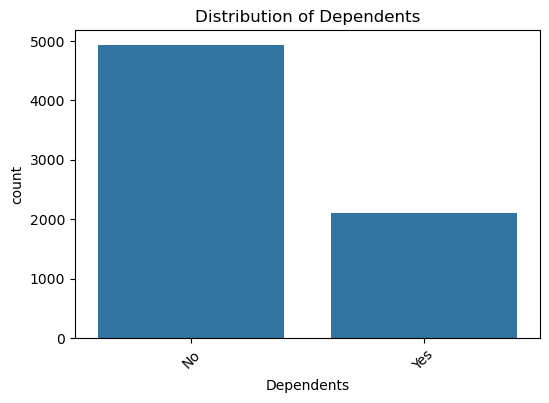

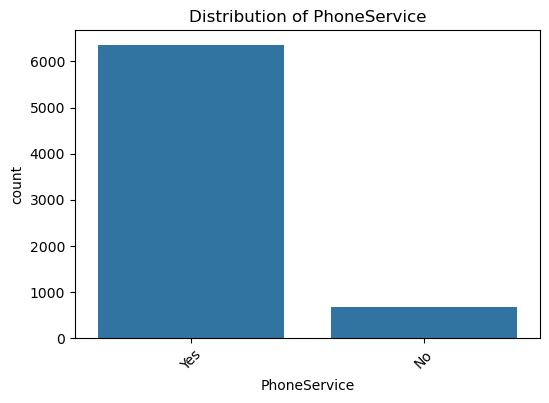

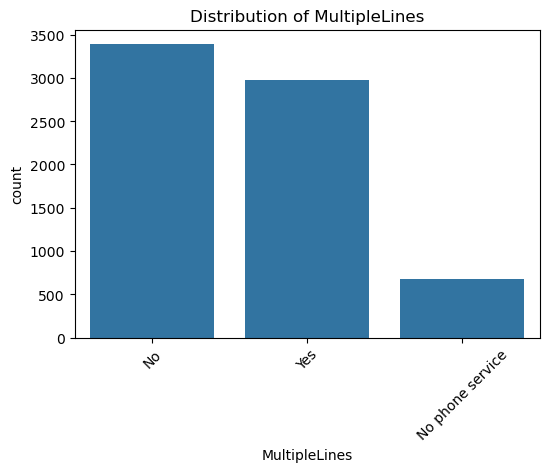

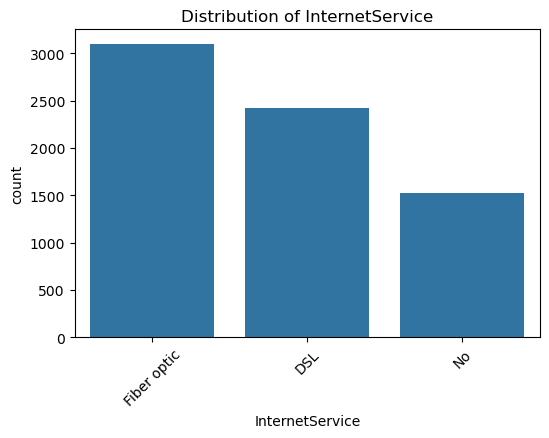

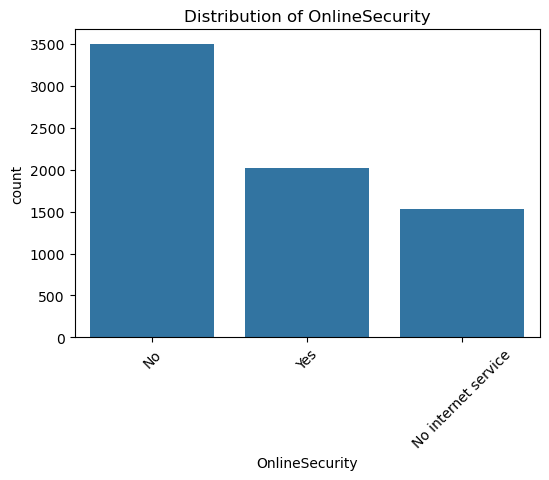

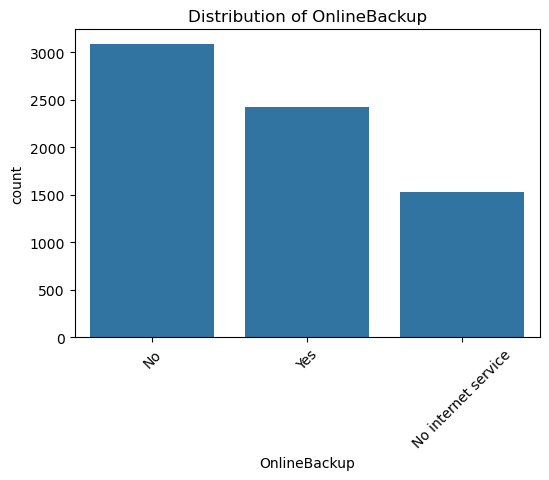

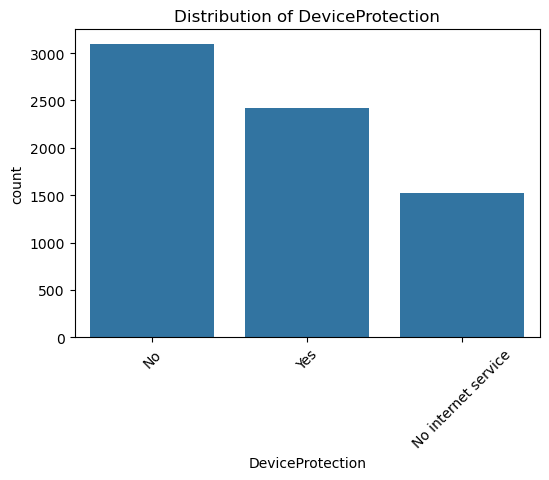

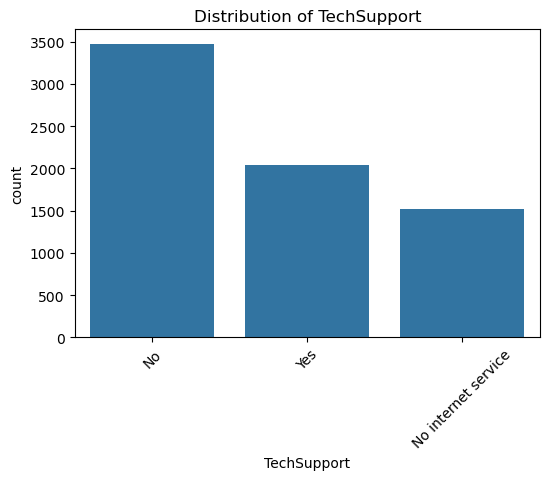

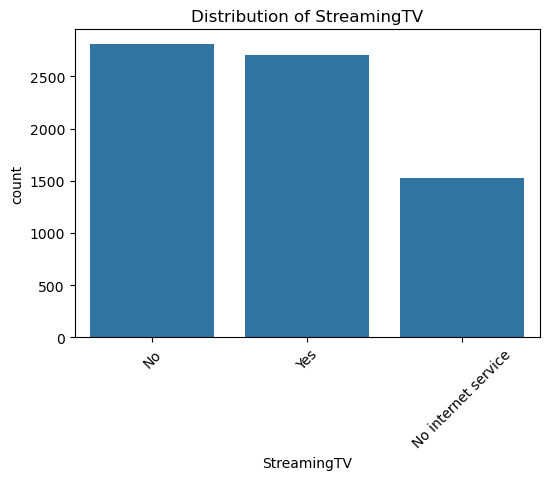

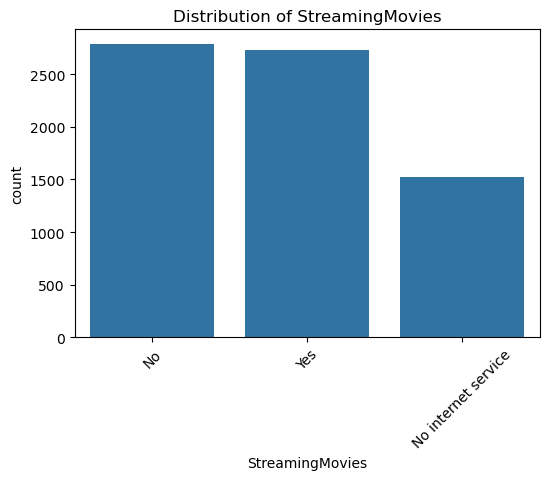

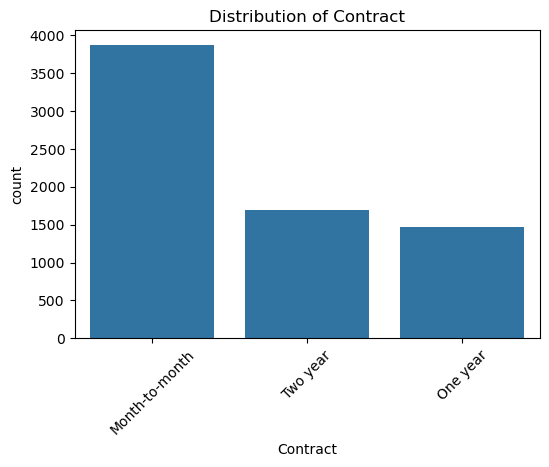

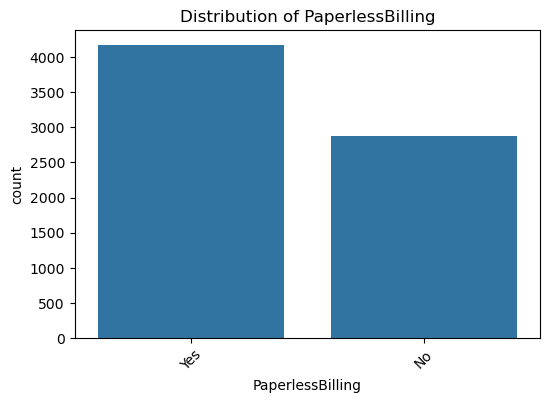

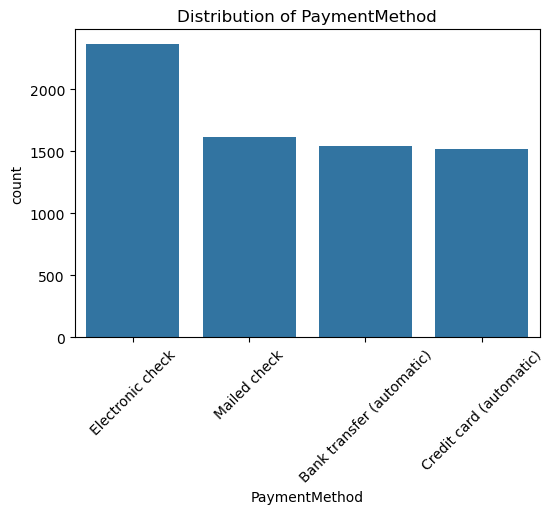

In [24]:
for col in cat_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(x=col, data=df_copy, order=df_copy[col].value_counts().index)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    plt.show()

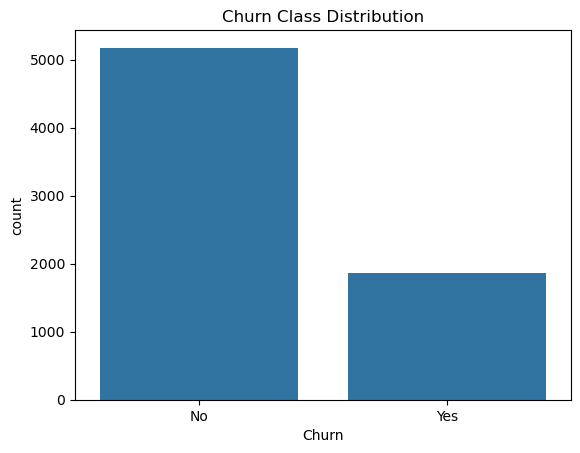

In [25]:
sns.countplot(x='Churn', data=df_copy)
plt.title('Churn Class Distribution')
plt.show()

BIVARIATE ANALYSIS - Features v/s Churn

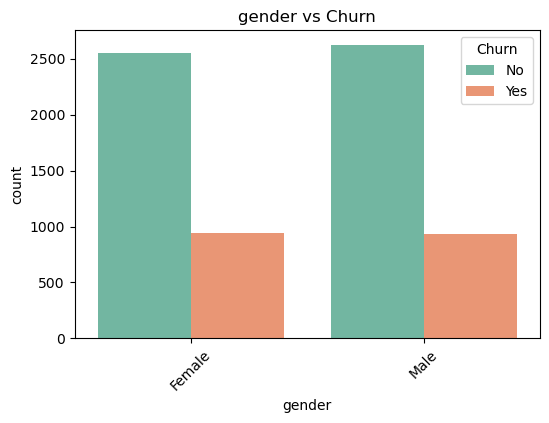

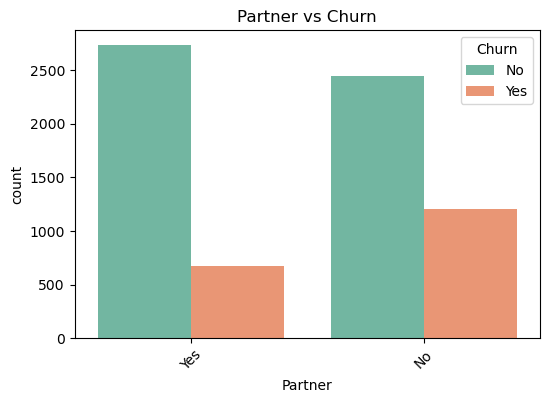

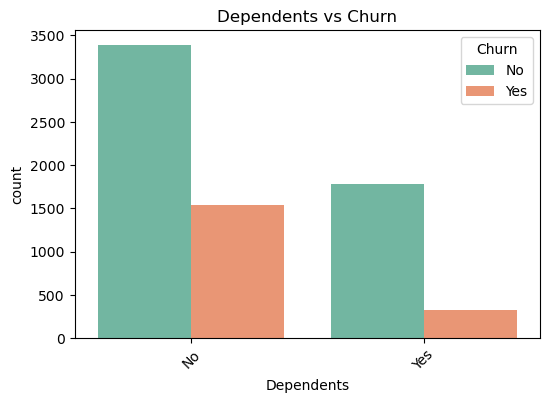

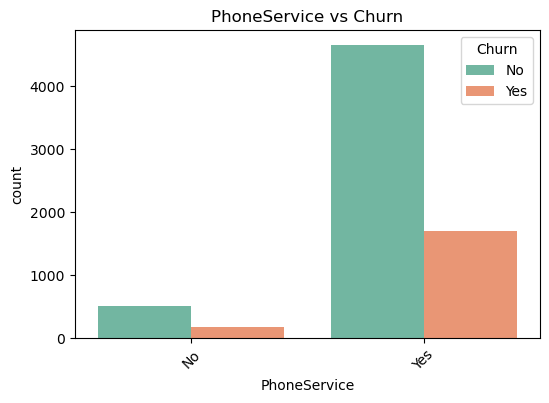

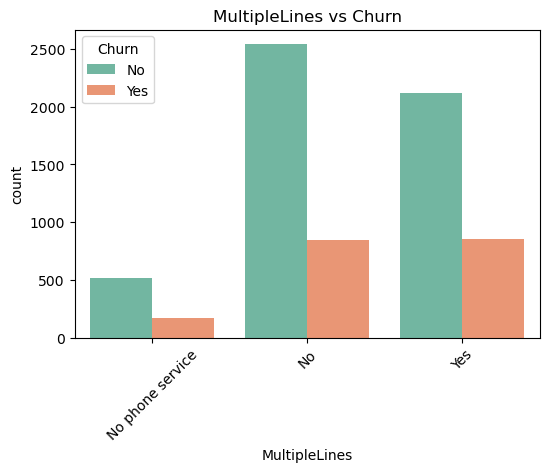

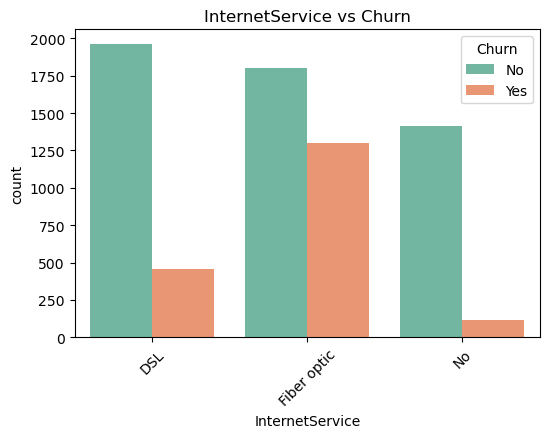

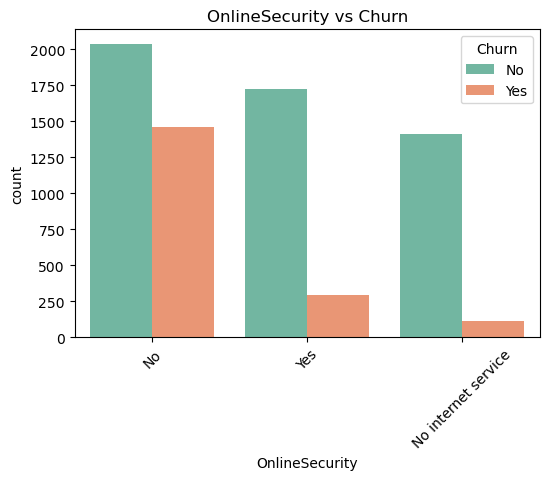

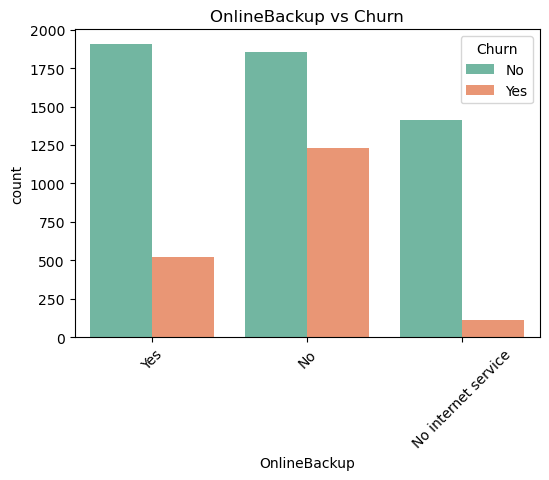

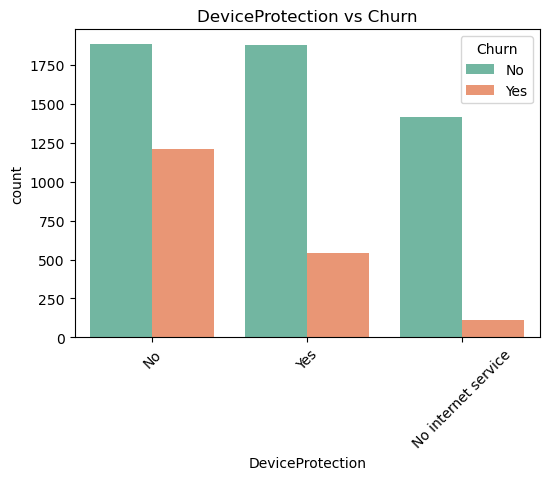

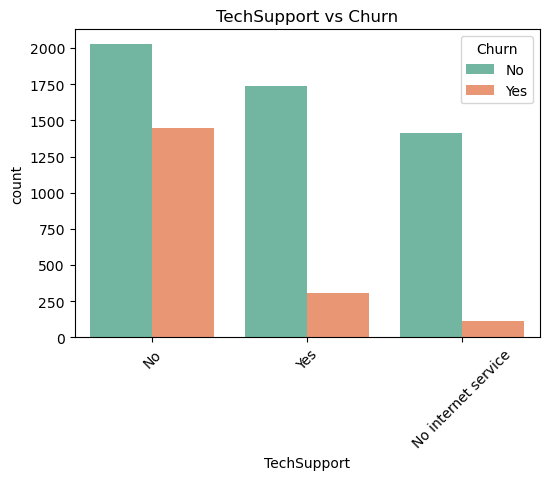

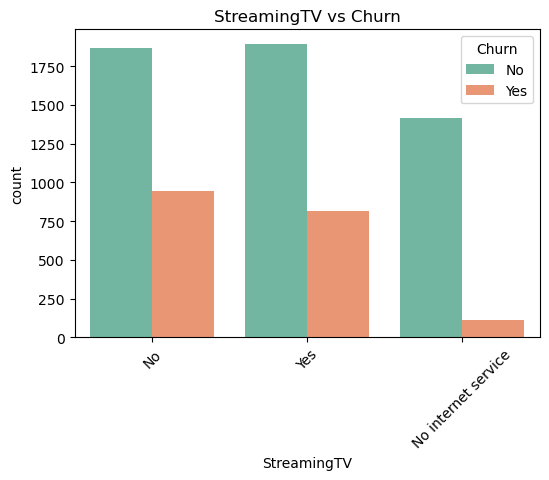

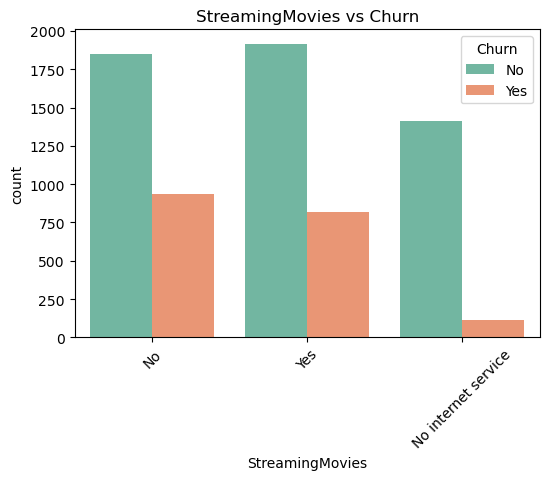

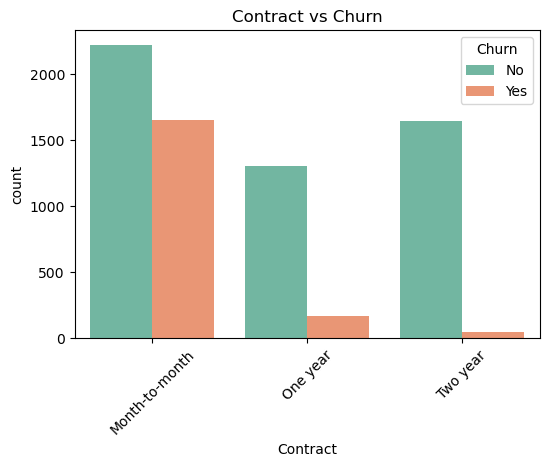

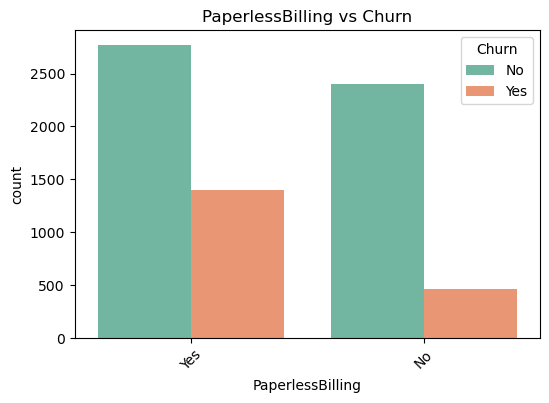

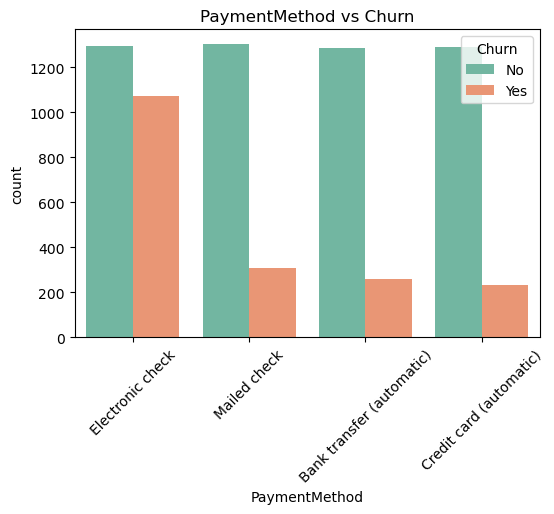

In [26]:
for col in cat_cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=col, hue='Churn', data=df_copy, palette='Set2')
    plt.title(f'{col} vs Churn')
    plt.xticks(rotation=45)
    plt.show()

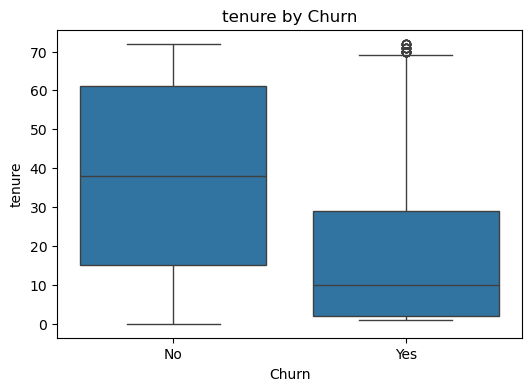

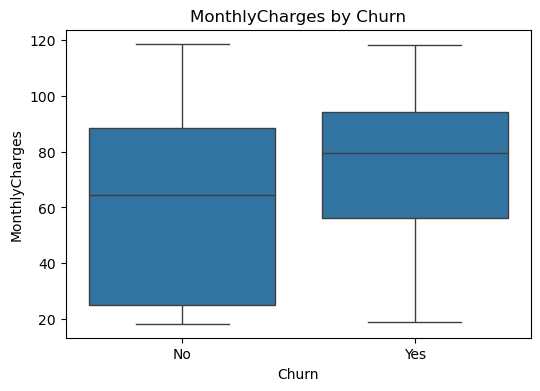

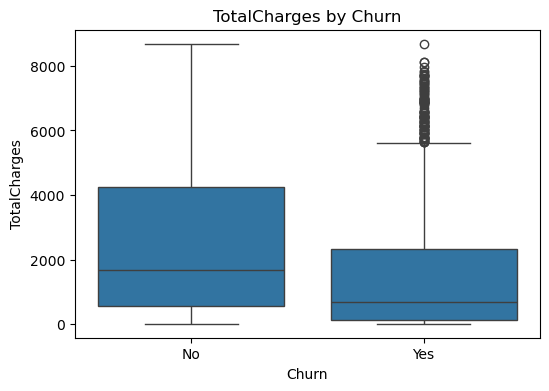

In [27]:
for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x='Churn', y=col, data=df_copy)
    plt.title(f'{col} by Churn')
    plt.show()

In [28]:
# T-test for numeric features:
for col in num_cols:
    churn_yes = df_copy[df_copy['Churn']=='Yes'][col]
    churn_no = df_copy[df_copy['Churn']=='No'][col]
    t_stat, p_val = stats.ttest_ind(churn_yes, churn_no)
    print(f'{col}: p-value = {p_val}')

# p < 0.05 → significant difference → feature useful.

tenure: p-value = 7.99905796059022e-205
MonthlyCharges: p-value = 2.7066456068884154e-60
TotalCharges: p-value = nan


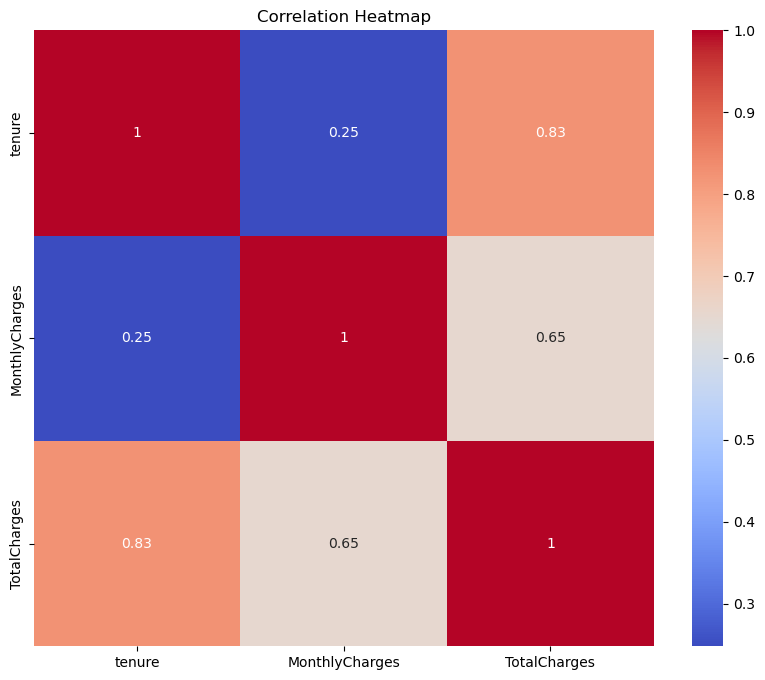

In [29]:
# Correlation Heatmap of numerical columns
plt.figure(figsize=(10,8))
num_df = pd.DataFrame(df_copy[num_cols])
sns.heatmap(num_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [30]:
print("Rows with missing TotalCharges:")
df_copy[df_copy['TotalCharges'].isnull()][['tenure', 'MonthlyCharges', 'TotalCharges']]

Rows with missing TotalCharges:


,tenure,MonthlyCharges,TotalCharges
488,0,52.55,NaN
753,0,20.25,NaN
936,0,80.85,NaN
1082,0,25.75,NaN
1340,0,56.05,NaN
3331,0,19.85,NaN
3826,0,25.35,NaN
4380,0,20.00,NaN
5218,0,19.70,NaN
6670,0,73.35,NaN


In [31]:
df_copy['TotalCharges'] = df_copy['TotalCharges'].fillna(0)

DATA ENCODING

In [32]:
df_encoded = pd.get_dummies(df_copy, drop_first=True)
df_encoded.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,log_TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,0,1,29.85,29.85,3.429137,False,True,False,False,True,...,False,False,False,False,False,True,False,True,False,False
1,0,34,56.95,1889.50,7.544597,True,False,False,True,False,...,False,False,False,True,False,False,False,False,True,False
2,0,2,53.85,108.15,4.692723,True,False,False,True,False,...,False,False,False,False,False,True,False,False,True,True
3,0,45,42.30,1840.75,7.518471,True,False,False,False,True,...,False,False,False,True,False,False,False,False,False,False
4,0,2,70.70,151.65,5.028148,False,False,False,True,False,...,False,False,False,False,False,True,False,True,False,True


In [33]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [34]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 32 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   SeniorCitizen                          7043 non-null   int64  
 1   tenure                                 7043 non-null   int64  
 2   MonthlyCharges                         7043 non-null   float64
 3   TotalCharges                           7043 non-null   float64
 4   log_TotalCharges                       7032 non-null   float64
 5   gender_Male                            7043 non-null   bool   
 6   Partner_Yes                            7043 non-null   bool   
 7   Dependents_Yes                         7043 non-null   bool   
 8   PhoneService_Yes                       7043 non-null   bool   
 9   MultipleLines_No phone service         7043 non-null   bool   
 10  MultipleLines_Yes                      7043 non-null   bool   
 11  Inte

In [35]:
df_encoded = df_encoded.fillna(0)

FEATURE SCALING

In [36]:
X = df_encoded.drop('Churn_Yes', axis=1)
y = df_encoded['Churn_Yes']

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [38]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [39]:
X_train_scaled[0]

array([-4.37749204e-01, -4.65683364e-01, -4.73723375e-04, -4.19924521e-01,
        1.63426896e-01, -1.02516569e+00, -9.69578591e-01,  1.53218588e+00,
        3.29573443e-01, -3.29573443e-01, -8.60523366e-01, -8.87056733e-01,
       -5.24080751e-01, -5.24080751e-01,  1.58094240e+00, -5.24080751e-01,
       -7.33828011e-01, -5.24080751e-01,  1.38479574e+00, -5.24080751e-01,
       -6.37762944e-01, -5.24080751e-01, -7.94748183e-01, -5.24080751e-01,
        1.25076217e+00,  1.91010860e+00, -5.58352808e-01, -1.20000722e+00,
       -5.27655848e-01, -7.09649831e-01,  1.84247002e+00])

MODEL BUILDING

Baseline Model -> Logistic Regression

In [40]:
log_model = LogisticRegression(random_state=42)
log_model.fit(X_train_scaled, y_train)
y_pred_log = log_model.predict(X_test_scaled)

In [41]:
print('---------------Logisctic Regression Model performance---------------------\n')
print(f'Accuracy Score : {accuracy_score(y_pred_log, y_test) * 100}')
print(f'Confusion Matrix : {confusion_matrix(y_pred_log, y_test)}')
print(f'Classification Report : {classification_report(y_pred_log, y_test)}')

---------------Logisctic Regression Model performance---------------------

Accuracy Score : 81.05039034776436
Confusion Matrix : [[933 164]
 [103 209]]
Classification Report :               precision    recall  f1-score   support

       False       0.90      0.85      0.87      1097
        True       0.56      0.67      0.61       312

    accuracy                           0.81      1409
   macro avg       0.73      0.76      0.74      1409
weighted avg       0.83      0.81      0.82      1409



Improving the Model's Accuracy -> Random Forest Classifier

In [42]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)
y_pred_rf = rf_model.predict(X_test_scaled)

In [43]:
print('---------------Random Forest Model performance---------------------\n')
print(f'Accuracy Score : {accuracy_score(y_pred_rf, y_test) * 100}')
print(f'Confusion Matrix : {confusion_matrix(y_pred_rf, y_test)}')
print(f'Classification Report : {classification_report(y_pred_rf, y_test)}')

---------------Random Forest Model performance---------------------

Accuracy Score : 79.84386089425124
Confusion Matrix : [[939 187]
 [ 97 186]]
Classification Report :               precision    recall  f1-score   support

       False       0.91      0.83      0.87      1126
        True       0.50      0.66      0.57       283

    accuracy                           0.80      1409
   macro avg       0.70      0.75      0.72      1409
weighted avg       0.82      0.80      0.81      1409



Further Improve -> XGBoost Classifier

In [44]:
xgb_model = XGBClassifier(n_estimators=100, random_state=42)
xgb_model.fit(X_train_scaled, y_train)
y_pred_xgb = xgb_model.predict(X_test_scaled)

In [45]:
print('---------------XGBoost Classifier Model performance---------------------\n')
print(f'Accuracy Score : {accuracy_score(y_pred_xgb, y_test) * 100}')
print(f'Confusion Matrix : {confusion_matrix(y_pred_xgb, y_test)}')
print(f'Classification Report : {classification_report(y_pred_xgb, y_test)}')

---------------XGBoost Classifier Model performance---------------------

Accuracy Score : 79.13413768630234
Confusion Matrix : [[920 178]
 [116 195]]
Classification Report :               precision    recall  f1-score   support

           0       0.89      0.84      0.86      1098
           1       0.52      0.63      0.57       311

    accuracy                           0.79      1409
   macro avg       0.71      0.73      0.72      1409
weighted avg       0.81      0.79      0.80      1409



The Models are performing almost equally. So, to get better results we'll now tune our models to the best settings, for which we'll do Hyperparameter Tuning using GridSearchCV

Hyperparameter Tuning -> GridSearchCV

In [46]:
# A combination set for XGBoost 
param_grid = {
    'max_depth' : [3,4,5],
    'learning_rate' : [0.1, 0.01, 0.05],
    'n_estimators' : [100, 200, 300]
}

In [47]:
grid_search = GridSearchCV(estimator=XGBClassifier(random_state=42),
                           param_grid=param_grid,
                           scoring='f1',
                           cv=3,
                           verbose=1
                          )

In [48]:
grid_search.fit(X_train_scaled, y_train)
print(f'Best parameters for XGBoost : {grid_search.best_params_}')

Fitting 3 folds for each of 27 candidates, totalling 81 fits
Best parameters for XGBoost : {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 100}


In [49]:
best_xgb_model = grid_search.best_estimator_
y_pred_xgb_tuned = best_xgb_model.predict(X_test_scaled)

In [50]:
print('---------------Tuned XGBoost Classifier Model performance---------------------\n')
print(f'Accuracy Score : {accuracy_score(y_pred_xgb_tuned, y_test) * 100}')
print(f'Confusion Matrix : {confusion_matrix(y_pred_xgb_tuned, y_test)}')
print(f'Classification Report : {classification_report(y_pred_xgb_tuned, y_test)}')

---------------Tuned XGBoost Classifier Model performance---------------------

Accuracy Score : 81.26330731014905
Confusion Matrix : [[944 172]
 [ 92 201]]
Classification Report :               precision    recall  f1-score   support

           0       0.91      0.85      0.88      1116
           1       0.54      0.69      0.60       293

    accuracy                           0.81      1409
   macro avg       0.73      0.77      0.74      1409
weighted avg       0.83      0.81      0.82      1409



FEATURE IMPORTANCE

C:\Users\asus\AppData\Local\Temp\ipykernel_8836\642006405.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='importance', y='feature', data=feature_importance_df.head(15), palette='viridis')


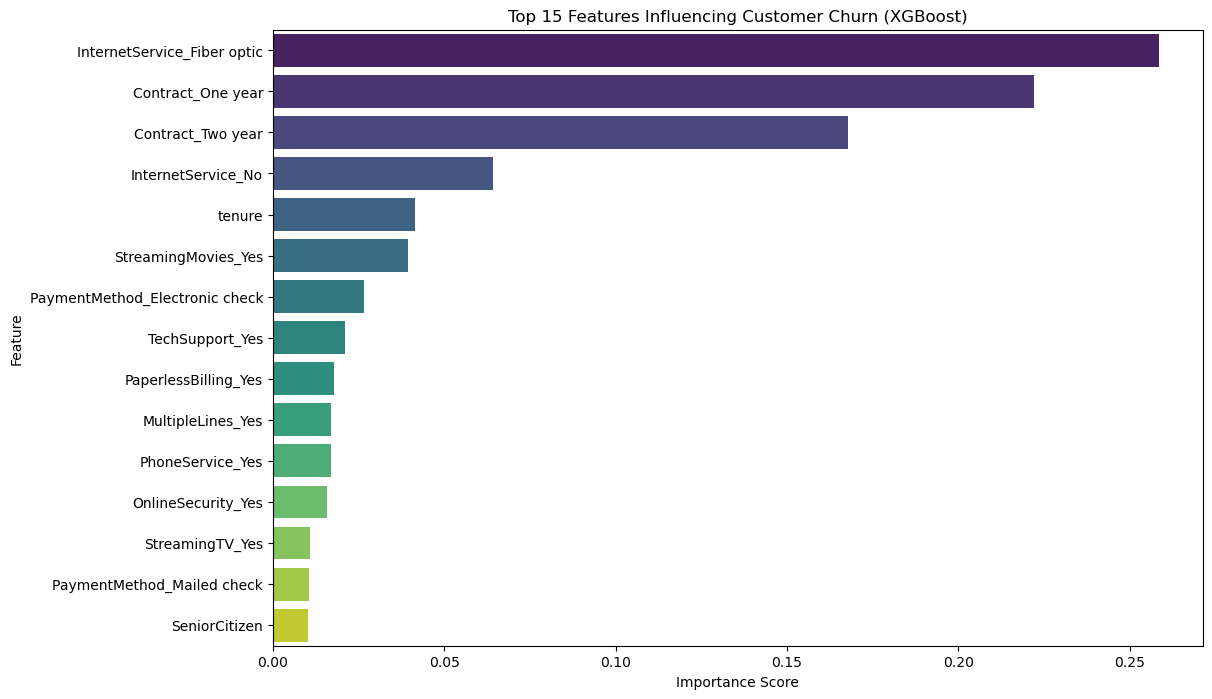

In [51]:
importances = best_xgb_model.feature_importances_

feature_importance_df = pd.DataFrame({
    'feature': X.columns,
    'importance': importances
}).sort_values('importance', ascending=False)

# Top 15 features plot
plt.figure(figsize=(12, 8))
sns.barplot(x='importance', y='feature', data=feature_importance_df.head(15), palette='viridis')
plt.title('Top 15 Features Influencing Customer Churn (XGBoost)')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()

SMOTE for handling Class Imbalance

In [52]:
smote = SMOTE(random_state=42)
print(f'Before SMOTE training data distribution : {Counter(y_train)}')
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
print(f'After SMOTE training data distribution : {Counter(y_train_smote)}')

Before SMOTE training data distribution : Counter({False: 4138, True: 1496})
After SMOTE training data distribution : Counter({False: 4138, True: 4138})


In [53]:
scaler_smote = StandardScaler()
X_train_scaled_smote = scaler_smote.fit_transform(X_train_smote)
X_test_scaled_smote = scaler_smote.transform(X_test)

In [54]:
best_xgb_model_smote = XGBClassifier(learning_rate=0.1, max_depth=4, n_estimators=100, random_state=42)
best_xgb_model_smote.fit(X_train_scaled_smote, y_train_smote)
y_pred_xgb_smote = best_xgb_model_smote.predict(X_test_scaled_smote)

In [55]:
print("\n--- Tuned XGBoost Model with SMOTE Performance ---")
print("\nAccuracy:", accuracy_score(y_test, y_pred_xgb_smote))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb_smote))
print("\nClassification Report:\n", classification_report(y_test, y_pred_xgb_smote))


--- Tuned XGBoost Model with SMOTE Performance ---

Accuracy: 0.7885024840312278

Confusion Matrix:
 [[855 181]
 [117 256]]

Classification Report:
               precision    recall  f1-score   support

       False       0.88      0.83      0.85      1036
        True       0.59      0.69      0.63       373

    accuracy                           0.79      1409
   macro avg       0.73      0.76      0.74      1409
weighted avg       0.80      0.79      0.79      1409



MODEL DEPLOYMENT

In [56]:
import joblib
# Model (trained on SMOTE data)
joblib.dump(best_xgb_model_smote, 'churn_model.joblib')

# Scaler (fitted on SMOTE data)
joblib.dump(scaler_smote, 'scaler.joblib')

print("Model and Scaler successfully saved!")

Model and Scaler successfully saved!


In [57]:
train_cols_list = X.columns.tolist()
joblib.dump(train_cols_list, 'train_columns.joblib')
print("Training columns saved!")

Training columns saved!
